In [83]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [84]:
for i in range(40):
    if i==0:
        train = pd.read_pickle('salida/nuevo4f/MultiNLI/TRAIN/TRAIN_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4f/MultiNLI/TRAIN/TRAIN_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            print(i+1)

In [85]:
train=train.reset_index(drop=True)
train

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,1.859071,0.000000,0.000000,0.000000,0.000000,0.000000,4.367289,0.001164,0.758243,...,0,9,0.666667,0.000000,0,,0,,0.666667,1
1,1.113204,2.200271,1.653661,3.806791,0.004579,0.380384,0.145830,4.335557,0.001573,0.718266,...,1,25,0.833333,0.724271,0,,0,,0.400000,0
2,1.272882,2.039293,1.939354,3.757981,0.005768,0.188705,0.061891,3.804990,0.004210,0.215116,...,4,5,0.333333,0.041841,0,,0,,0.000000,0
3,1.216655,2.251629,0.918296,3.897728,0.008673,0.259838,0.130340,4.321115,0.003176,0.629919,...,1,3,0.000000,1.000000,0,,0,,0.333333,0
4,0.000000,2.122217,0.000000,0.000000,0.000000,0.000000,0.000000,4.513545,0.000645,0.894944,...,0,13,1.000000,0.000000,0,,0,,0.333333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392697,0.974302,2.311278,1.500000,3.823113,0.003372,0.525360,0.328866,4.475575,0.000755,0.881340,...,1,4,0.750000,1.061278,0,,1,do,0.666667,2
392698,1.233626,1.977029,1.554610,3.873063,0.004149,0.239049,0.048391,4.455544,0.000942,0.762691,...,1,15,0.000000,0.186919,0,,0,,0.750000,1
392699,1.353649,1.788600,1.357131,3.812028,0.006537,0.083108,0.009919,4.252100,0.002299,0.541554,...,4,7,0.500000,0.255143,0,,0,,0.250000,0
392700,1.286355,1.798697,1.644559,3.821932,0.004731,0.172008,0.018540,3.951765,0.002859,0.326110,...,5,16,0.285714,0.041202,0,,0,,0.166667,1


In [86]:
train[train["clases"]==2]

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
8,0.873120,1.000000,1.000000,3.923693,0.003344,0.618823,0.582590,3.923693,0.003510,0.618823,...,1,2,0.000000,0.000000,0,,0,,0.000000,2
9,0.978322,1.912946,2.029596,3.924045,0.004050,0.368778,0.066134,3.475339,0.002247,0.406270,...,5,16,0.285714,0.032901,0,,0,,0.333333,2
11,1.321244,2.197160,0.918296,3.807028,0.005023,0.127150,0.060292,4.343655,0.001267,0.709050,...,1,3,0.666667,1.194988,0,,0,,1.000000,2
14,1.127414,2.266963,2.118078,3.863182,0.004195,0.364473,0.099543,4.611701,0.000451,0.909211,...,1,11,0.857143,0.437623,1,mean,0,,0.500000,2
17,1.000006,1.551098,1.500000,3.989096,0.006188,0.244704,0.091308,2.934207,0.001503,0.414901,...,1,4,0.666667,0.590643,0,,0,,0.750000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392683,1.152883,1.964141,1.532915,3.823113,0.005003,0.335450,0.046955,4.510664,0.000891,0.833862,...,1,15,0.750000,0.388004,0,,0,,0.666667,2
392688,1.255956,2.100990,1.612650,3.863050,0.005275,0.208789,0.027904,4.290226,0.001917,0.615247,...,2,11,0.333333,0.234478,0,,0,,0.500000,2
392692,1.000029,1.634961,1.459471,3.841671,0.004111,0.159509,0.025913,4.281284,0.001491,0.640658,...,1,25,0.750000,0.130294,0,,0,,0.000000,2
392693,1.005084,2.227212,2.118622,3.899611,0.003599,0.428675,0.060833,4.157255,0.002027,0.619856,...,5,14,0.444444,0.076415,0,,0,,0.250000,2


<Axes: title={'center': 'entropia_relaciones'}, xlabel='clases'>

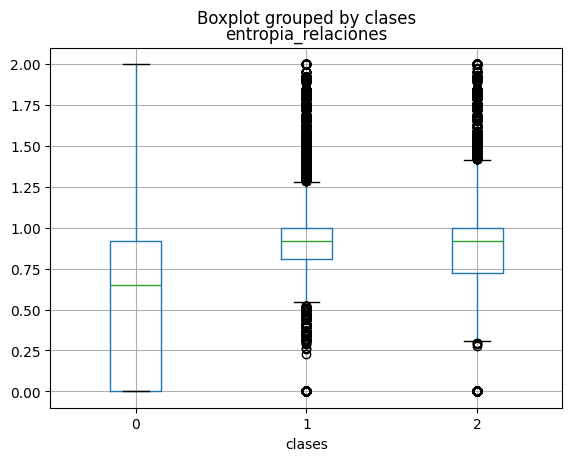

In [156]:
train.boxplot(by="clases",column="entropia_relaciones")

In [88]:
train["mutinf"]=train["mutinf"]/train["mutinf_t"]
train["max_info"]=train["max_info"]/train["max_info_t"]
#train["mearts"]=train["mearts"]/train["mearts_t"]
#train["entropias"]=train["entropias"]/train["entropia_total"]
train["sumas"]=train["sumas"]/train["sumas_t"]
train["list_m"]=train["list_m"]/train["list_M"]
train=train.drop(["verbT","verbH","KL_divergence","entropia_total","mutinf_t","max_info_t",
                  "mearts_t","sumas_t","list_M"],axis=1)
train["mearts"]=train["mearts"]*train["distancias"]
#train=train.drop(["distancias","list_incomp","negH","max_info",'list_comp','list_T','negT'],axis=1)

## Eliminar características

In [89]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
#train=train.drop(["verbH","verbT","distancias","mutinf","entropias","diferencias"],axis=1)
#train=train.drop(["verbH","verbT"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,distancias,entropias,mutinf,mearts,max_info,sumas,list_comp,diferencias,list_incomp,entropia_relaciones,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2,0.000000,0,0.000000,0.000000,9,0.666667,0,0,0.666667,1
1,1.113204,1.653661,0.878040,0.005097,0.529586,1.237697,2,0.040000,0,0.650022,0.166667,25,0.833333,0,0,0.400000,0
2,1.272882,1.939354,0.987646,0.007341,0.877225,0.768252,2,0.800000,0,1.459148,0.666667,5,0.333333,0,0,0.000000,0
3,1.216655,0.918296,0.902019,0.010552,0.412494,0.497209,0,0.333333,0,1.000000,0.500000,3,0.000000,0,0,0.333333,0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,0,0.000000,0.000000,13,1.000000,0,0,0.333333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392697,0.974302,1.500000,0.854217,0.003285,0.596093,0.989890,0,0.250000,0,0.811278,0.250000,4,0.750000,0,1,0.666667,2
392698,1.233626,1.554610,0.869268,0.005118,0.313428,0.435654,1,0.066667,0,0.591673,0.142857,15,0.000000,0,0,0.750000,1
392699,1.353649,1.357131,0.896505,0.008849,0.153463,0.094125,0,0.571429,0,1.000000,0.500000,7,0.500000,0,0,0.250000,0
392700,1.286355,1.644559,0.967146,0.006086,0.527456,0.447462,1,0.312500,0,1.378783,0.714286,16,0.285714,0,0,0.166667,1


In [90]:
train.columns

Index(['distancias', 'entropias', 'mutinf', 'mearts', 'max_info', 'sumas',
       'list_comp', 'diferencias', 'list_incomp', 'entropia_relaciones',
       'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH', 'overlap_ent',
       'clases'],
      dtype='object')

In [91]:
#train=train[['list_comp', 'list_incomp','list_m','negT', 'negH',"clases"]]

In [92]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [93]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [94]:
train_m

,distancias,entropias,mutinf,mearts,max_info,sumas,list_comp,diferencias,list_incomp,entropia_relaciones,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent
distancias,1.000000,0.723613,0.910108,0.588974,0.514396,0.513746,0.005991,0.394503,0.084758,0.729117,0.625511,-0.065845,-0.343903,-0.024032,0.105650,-0.310410
entropias,0.723613,1.000000,0.797956,0.249850,0.682345,0.733784,0.026858,0.209772,0.228245,0.718189,0.548483,0.137883,-0.213096,0.072959,0.157454,-0.268794
mutinf,0.910108,0.797956,1.000000,0.402011,0.706832,0.678623,0.019814,0.367943,0.147413,0.755867,0.665385,-0.003887,-0.354550,-0.024853,0.110583,-0.339853
mearts,0.588974,0.249850,0.402011,1.000000,0.181001,0.160244,-0.020941,0.324827,0.002148,0.387882,0.386443,-0.125192,-0.240084,-0.047161,0.001372,-0.179161
max_info,0.514396,0.682345,0.706832,0.181001,1.000000,0.880933,0.041836,0.363460,0.248211,0.505526,0.689732,-0.003309,-0.377201,0.028517,0.108542,-0.340011
sumas,0.513746,0.733784,0.678623,0.160244,0.880933,1.000000,0.035193,0.254252,0.220884,0.507661,0.573496,0.084322,-0.280607,0.071547,0.125910,-0.281040
list_comp,0.005991,0.026858,0.019814,-0.020941,0.041836,0.035193,1.000000,-0.091187,-0.135920,-0.011884,-0.179330,0.114851,0.025100,-0.003299,-0.010731,-0.229833
diferencias,0.394503,0.209772,0.367943,0.324827,0.363460,0.254252,-0.091187,1.000000,0.120953,0.283471,0.625246,-0.393515,-0.438225,-0.084639,0.088443,-0.237463
list_incomp,0.084758,0.228245,0.147413,0.002148,0.248211,0.220884,-0.135920,0.120953,1.000000,0.314919,0.267659,0.021639,-0.030900,-0.002927,0.029618,-0.041848
entropia_relaciones,0.729117,0.718189,0.755867,0.387882,0.505526,0.507661,-0.011884,0.283471,0.314919,1.000000,0.587686,0.037161,-0.287848,-0.009681,0.105563,-0.301238


<Axes: >

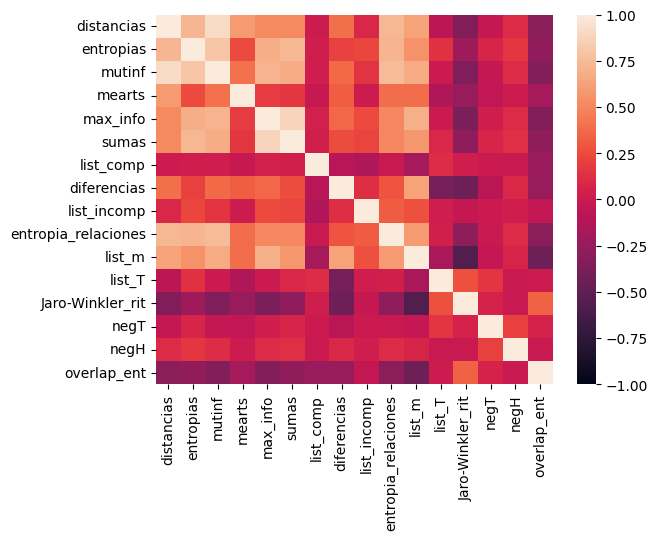

In [95]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [96]:
train_m

,distancias,entropias,mutinf,mearts,max_info,sumas,list_comp,diferencias,list_incomp,entropia_relaciones,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent
distancias,1.000000,0.723613,0.910108,0.588974,0.514396,0.513746,0.005991,0.394503,0.084758,0.729117,0.625511,-0.065845,-0.343903,-0.024032,0.105650,-0.310410
entropias,0.723613,1.000000,0.797956,0.249850,0.682345,0.733784,0.026858,0.209772,0.228245,0.718189,0.548483,0.137883,-0.213096,0.072959,0.157454,-0.268794
mutinf,0.910108,0.797956,1.000000,0.402011,0.706832,0.678623,0.019814,0.367943,0.147413,0.755867,0.665385,-0.003887,-0.354550,-0.024853,0.110583,-0.339853
mearts,0.588974,0.249850,0.402011,1.000000,0.181001,0.160244,-0.020941,0.324827,0.002148,0.387882,0.386443,-0.125192,-0.240084,-0.047161,0.001372,-0.179161
max_info,0.514396,0.682345,0.706832,0.181001,1.000000,0.880933,0.041836,0.363460,0.248211,0.505526,0.689732,-0.003309,-0.377201,0.028517,0.108542,-0.340011
sumas,0.513746,0.733784,0.678623,0.160244,0.880933,1.000000,0.035193,0.254252,0.220884,0.507661,0.573496,0.084322,-0.280607,0.071547,0.125910,-0.281040
list_comp,0.005991,0.026858,0.019814,-0.020941,0.041836,0.035193,1.000000,-0.091187,-0.135920,-0.011884,-0.179330,0.114851,0.025100,-0.003299,-0.010731,-0.229833
diferencias,0.394503,0.209772,0.367943,0.324827,0.363460,0.254252,-0.091187,1.000000,0.120953,0.283471,0.625246,-0.393515,-0.438225,-0.084639,0.088443,-0.237463
list_incomp,0.084758,0.228245,0.147413,0.002148,0.248211,0.220884,-0.135920,0.120953,1.000000,0.314919,0.267659,0.021639,-0.030900,-0.002927,0.029618,-0.041848
entropia_relaciones,0.729117,0.718189,0.755867,0.387882,0.505526,0.507661,-0.011884,0.283471,0.314919,1.000000,0.587686,0.037161,-0.287848,-0.009681,0.105563,-0.301238


In [97]:
train_m.idxmin()

distancias             Jaro-Winkler_rit
entropias                   overlap_ent
mutinf                 Jaro-Winkler_rit
mearts                 Jaro-Winkler_rit
max_info               Jaro-Winkler_rit
sumas                       overlap_ent
list_comp                   overlap_ent
diferencias            Jaro-Winkler_rit
list_incomp                   list_comp
entropia_relaciones         overlap_ent
list_m                 Jaro-Winkler_rit
list_T                      diferencias
Jaro-Winkler_rit                 list_m
negT                        diferencias
negH                        overlap_ent
overlap_ent                      list_m
dtype: object

In [98]:
# Checar variables colineales
#sns.relplot(data=train_m, x="list_bigram", y="bi_ent_trip_rel")

In [99]:
#X_dev = np.array(dev.drop(['CLASS'],axis=1))
#y_d = np.array(dev['CLASS'])

In [100]:
# SICK
# y_train=[]
# for i in y_:
#     if i == "entailment":
#         y_train.append(1)
#     elif i == "neutral":
#         y_train.append(2)
#     else:
#         y_train.append(0)

In [101]:
y_train=y_.values

In [102]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

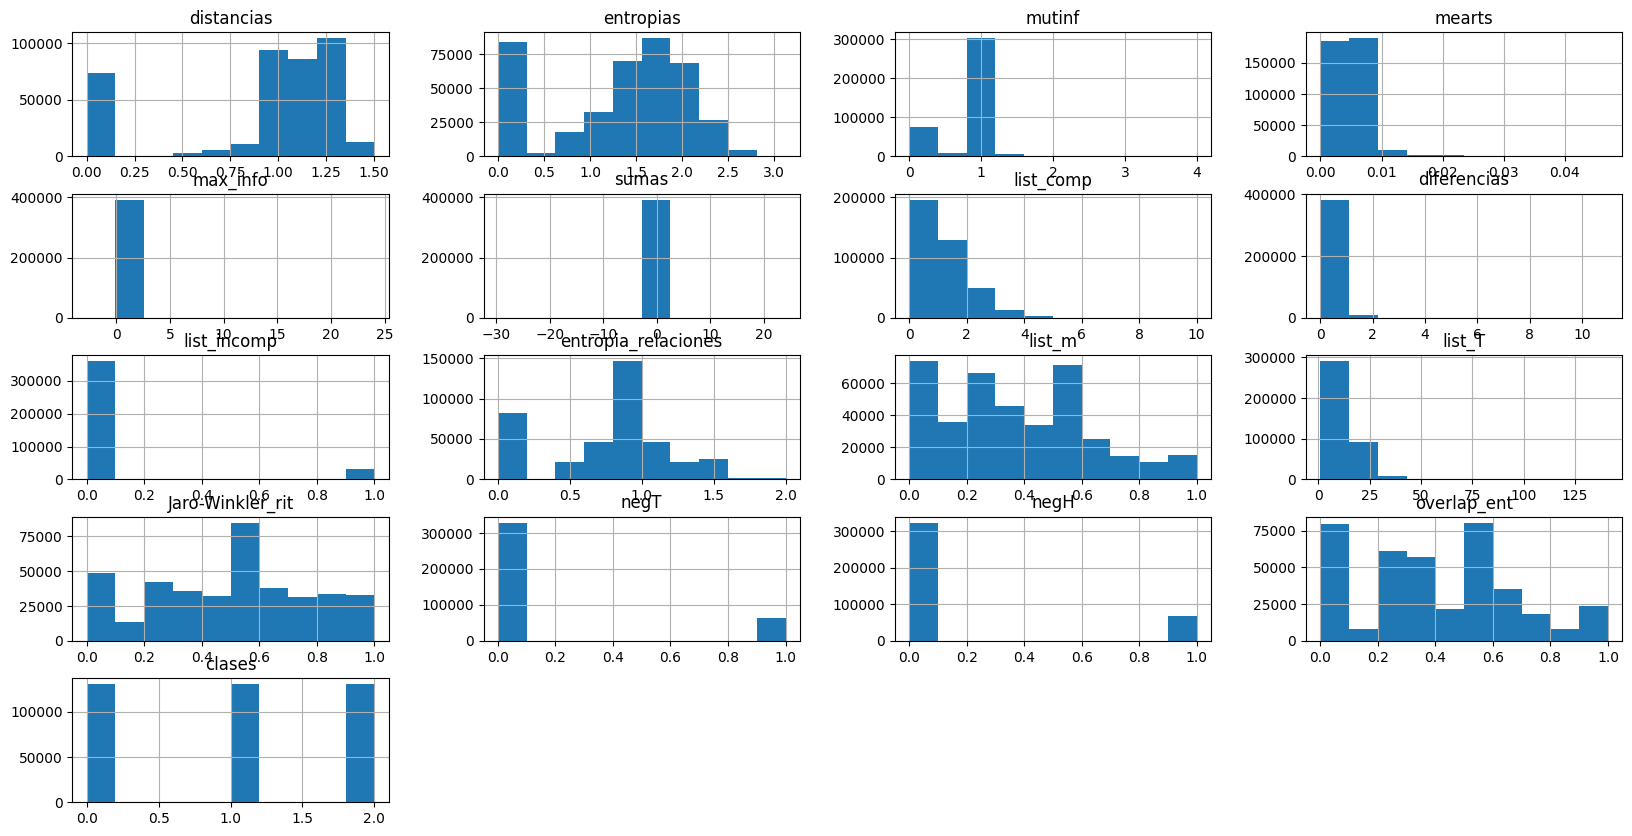

In [103]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [104]:
for i in range(1):
    if i==0:
        test = pd.read_pickle('salida/nuevo4f/MultiNLI/DEVM/DEV_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4f/MultiNLI/DEVM/DEV_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            print(i+1)

In [105]:
test = test.reset_index(drop=True)
test

,distancias,entropia_total,entropias,mutinf,mearts,max_info,sumas,mutinf_t,mearts_t,max_info_t,...,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,verbT,negH,verbH,overlap_ent,clases
0,1.240875,2.625000,2.250000,3.819025,0.005625,0.222686,0.130002,4.064680,0.003160,0.446530,...,2,4,0.000000,0.250000,0,,0,,0.000000,neutral
1,1.288204,2.106678,1.438432,3.801256,0.004022,0.170025,0.046991,4.161646,0.002083,0.597851,...,3,10,0.375000,0.316162,0,,1,be,0.333333,contradiction
2,1.174333,2.372000,2.123557,3.833050,0.005071,0.303952,0.120386,4.187550,0.002339,0.608355,...,3,12,0.571429,0.087663,1,know,0,,0.400000,entailment
3,1.115195,2.202472,2.109102,3.986944,0.003955,0.368729,0.090833,4.240373,0.002108,0.567515,...,5,16,0.444444,0.038078,0,,0,,0.000000,contradiction
4,1.039450,2.721928,2.321928,3.750974,0.003642,0.459750,0.266639,4.245573,0.001704,0.729875,...,1,5,0.500000,0.400000,1,know,0,,1.000000,contradiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9892,1.000067,1.924719,1.610216,3.912337,0.005201,0.193320,0.048845,4.332535,0.001802,0.634045,...,3,20,0.375000,0.109491,0,,0,,0.500000,neutral
9893,1.352843,2.187913,0.918296,3.815131,0.005428,0.084910,0.017071,4.512145,0.000649,0.847485,...,1,9,0.833333,0.565331,0,,0,,0.750000,contradiction
9894,0.000000,2.154939,0.000000,0.000000,0.000000,0.000000,0.000000,4.346858,0.000677,0.805978,...,0,15,0.750000,0.000000,0,,0,,0.500000,entailment
9895,0.000000,1.906113,0.000000,0.000000,0.000000,0.000000,0.000000,4.741702,0.000000,1.000000,...,0,21,1.000000,0.000000,0,,0,,0.500000,entailment


In [106]:
test["mutinf"]=test["mutinf"]/test["mutinf_t"]
test["max_info"]=test["max_info"]/test["max_info_t"]
#train["mearts"]=train["mearts"]/train["mearts_t"]
#train["entropias"]=train["entropias"]/train["entropia_total"]
test["sumas"]=test["sumas"]/test["sumas_t"]
test["list_m"]=test["list_m"]/test["list_M"]
test=test.drop(["verbT","verbH","KL_divergence","entropia_total","mutinf_t","max_info_t",
                  "mearts_t","sumas_t","list_M"],axis=1)
test["mearts"]=test["mearts"]*test["distancias"]
#test=test.drop(["distancias","list_incomp","negH","max_info",'list_comp','list_T','negT'],axis=1)

In [107]:
#test=test.drop(["verbH","verbT","distancias","mutinf","entropias","diferencias"],axis=1)
#test=test.drop(["verbH","verbT"],axis=1)
test

,distancias,entropias,mutinf,mearts,max_info,sumas,list_comp,diferencias,list_incomp,entropia_relaciones,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,1.240875,2.250000,0.939563,0.006980,0.498704,0.793035,1,0.500000,0,1.000000,0.500000,4,0.000000,0,0,0.000000,neutral
1,1.288204,1.438432,0.913402,0.005181,0.284394,0.409088,2,0.300000,0,0.954434,0.375000,10,0.375000,0,1,0.333333,contradiction
2,1.174333,2.123557,0.915344,0.005955,0.499630,0.685019,1,0.250000,0,0.985228,0.428571,12,0.571429,1,0,0.400000,entailment
3,1.115195,2.109102,0.940234,0.004411,0.649727,0.834710,1,0.312500,0,0.991076,0.555556,16,0.444444,0,0,0.000000,contradiction
4,1.039450,2.321928,0.883503,0.003786,0.629903,0.731499,0,0.200000,0,1.000000,0.500000,5,0.500000,1,0,1.000000,contradiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9892,1.000067,1.610216,0.903013,0.005201,0.304900,0.542757,1,0.150000,0,1.298795,0.375000,20,0.375000,0,0,0.500000,neutral
9893,1.352843,0.918296,0.845525,0.007343,0.100190,0.111630,0,0.111111,0,0.650022,0.166667,9,0.833333,0,0,0.750000,contradiction
9894,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,0,0.000000,0.000000,15,0.750000,0,0,0.500000,entailment
9895,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0.000000,0.000000,21,1.000000,0,0,0.500000,entailment


In [108]:
#test=test.drop(["sumas","mutinf","list_comp","list_incomp","entidades","entropia_total","list_rel_con",'mearts', 'max_info', 'similitud_faltantes','list_rel_con', 'list_M', 'list_m', 'list_T', 'list_bigram','diferencias'],axis=1)
#test=test[['list_comp', 'list_incomp','list_m','negT', 'negH',"clases"]]
test

,distancias,entropias,mutinf,mearts,max_info,sumas,list_comp,diferencias,list_incomp,entropia_relaciones,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,1.240875,2.250000,0.939563,0.006980,0.498704,0.793035,1,0.500000,0,1.000000,0.500000,4,0.000000,0,0,0.000000,neutral
1,1.288204,1.438432,0.913402,0.005181,0.284394,0.409088,2,0.300000,0,0.954434,0.375000,10,0.375000,0,1,0.333333,contradiction
2,1.174333,2.123557,0.915344,0.005955,0.499630,0.685019,1,0.250000,0,0.985228,0.428571,12,0.571429,1,0,0.400000,entailment
3,1.115195,2.109102,0.940234,0.004411,0.649727,0.834710,1,0.312500,0,0.991076,0.555556,16,0.444444,0,0,0.000000,contradiction
4,1.039450,2.321928,0.883503,0.003786,0.629903,0.731499,0,0.200000,0,1.000000,0.500000,5,0.500000,1,0,1.000000,contradiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9892,1.000067,1.610216,0.903013,0.005201,0.304900,0.542757,1,0.150000,0,1.298795,0.375000,20,0.375000,0,0,0.500000,neutral
9893,1.352843,0.918296,0.845525,0.007343,0.100190,0.111630,0,0.111111,0,0.650022,0.166667,9,0.833333,0,0,0.750000,contradiction
9894,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,0,0.000000,0.000000,15,0.750000,0,0,0.500000,entailment
9895,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0.000000,0.000000,21,1.000000,0,0,0.500000,entailment


In [109]:
test[test["clases"]=="contradiction"]

,distancias,entropias,mutinf,mearts,max_info,sumas,list_comp,diferencias,list_incomp,entropia_relaciones,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
1,1.288204,1.438432,0.913402,0.005181,0.284394,0.409088,2,0.300000,0,0.954434,0.375000,10,0.375000,0,1,0.333333,contradiction
3,1.115195,2.109102,0.940234,0.004411,0.649727,0.834710,1,0.312500,0,0.991076,0.555556,16,0.444444,0,0,0.000000,contradiction
4,1.039450,2.321928,0.883503,0.003786,0.629903,0.731499,0,0.200000,0,1.000000,0.500000,5,0.500000,1,0,1.000000,contradiction
5,1.085009,2.347874,0.910164,0.004617,0.575416,1.342902,1,0.125000,1,0.811278,0.500000,16,0.750000,0,0,0.250000,contradiction
6,1.088783,1.370951,0.896362,0.006209,0.478099,0.824073,0,0.200000,0,0.811278,0.250000,5,0.750000,0,1,0.666667,contradiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9881,1.141241,1.500000,0.857176,0.006100,0.489749,0.362548,1,0.250000,0,0.721928,0.200000,4,0.600000,0,0,0.500000,contradiction
9883,1.266577,1.584963,0.894673,0.005280,0.330398,0.499325,0,0.166667,1,1.000000,0.500000,6,0.500000,0,0,0.000000,contradiction
9891,1.271097,1.547895,0.940551,0.005224,0.361003,0.687919,1,0.214286,0,1.000000,0.500000,14,0.833333,1,0,0.000000,contradiction
9893,1.352843,0.918296,0.845525,0.007343,0.100190,0.111630,0,0.111111,0,0.650022,0.166667,9,0.833333,0,0,0.750000,contradiction


In [110]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [111]:
# SICK
y_test=[]
for i in y_t:
    if i == "entailment":
        y_test.append(0)
    elif i == "neutral":
        y_test.append(1)
    else:
        y_test.append(2)

In [112]:
y_test.count(1)

3094

In [113]:
y_test.count(0)

3440

In [114]:
y_test.count(2)

3363

In [115]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [116]:
# grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
# logreg=linear_model.LogisticRegression()
# logreg_cv=GridSearchCV(logreg,grid,cv=20)
# logreg_cv.fit(X_train,y_train)

In [117]:
# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

In [121]:
X_train = np.where(np.isnan(X_train), 0, X_train)
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.66666667],
       [0.74057172, 0.52969211, 0.2195099 , ..., 0.        , 0.        ,
        0.4       ],
       [0.84679942, 0.62120389, 0.24691138, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9005307 , 0.43470908, 0.22412617, ..., 0.        , 0.        ,
        0.25      ],
       [0.85576226, 0.52677655, 0.24178642, ..., 0.        , 0.        ,
        0.16666667],
       [0.73054725, 0.81546556, 0.24127477, ..., 0.        , 1.        ,
        0.16666667]])

In [122]:
X_train.shape

(392702, 16)

In [123]:
#model = LogisticRegression(penalty="l2", C=1,max_iter=1000,multi_class='multinomial',solver='newton-cg')
model = LogisticRegression(penalty="l2", C=1,max_iter=500,multi_class='ovr')
#model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=500, multi_class='ovr')

In [124]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 500,
 'multi_class': 'ovr',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [125]:
model.decision_function(X)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [126]:
labels=train.columns[:-1]
labels

Index(['distancias', 'entropias', 'mutinf', 'mearts', 'max_info', 'sumas',
       'list_comp', 'diferencias', 'list_incomp', 'entropia_relaciones',
       'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH', 'overlap_ent'],
      dtype='object')

In [127]:
model.classes_

array([0, 1, 2])

In [128]:
model.coef_[0]

array([-0.73609097,  0.31996503, -1.86002342,  0.37413753,  8.74973951,
       16.02750138, -1.56413344,  1.477115  , -0.1611629 , -1.10877121,
       -2.81102592, -2.64294242,  0.43495635, -0.02009655, -0.52418744,
        0.53380219])

In [129]:
coeficientes=model.coef_[0]

In [130]:
coeficientes

array([-0.73609097,  0.31996503, -1.86002342,  0.37413753,  8.74973951,
       16.02750138, -1.56413344,  1.477115  , -0.1611629 , -1.10877121,
       -2.81102592, -2.64294242,  0.43495635, -0.02009655, -0.52418744,
        0.53380219])

In [131]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  5 sumas 10 list_m


In [132]:
n_columns=train.shape[1]-1

In [133]:
n_columns

16

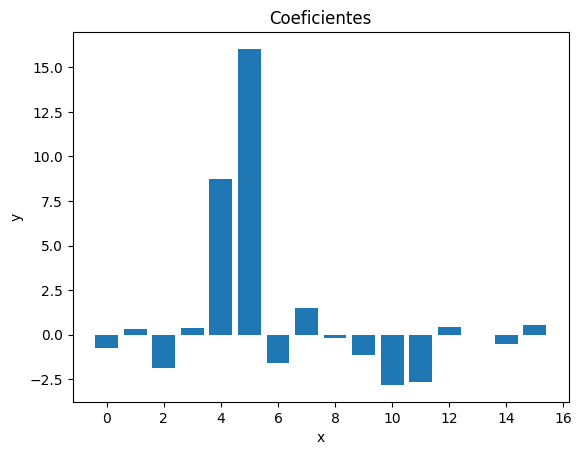

In [134]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [139]:
X_test = np.where(np.isnan(X_test), 0, X_test)
X_test

array([[0.8438514 , 0.80064626, 0.31318781, ..., 0.        , 0.        ,
        0.        ],
       [0.87603731, 0.51185576, 0.30446732, ..., 0.        , 1.        ,
        0.33333333],
       [0.79859947, 0.75565251, 0.30511482, ..., 1.        , 0.        ,
        0.4       ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.5       ],
       [0.77890153, 0.65199752, 0.31455944, ..., 0.        , 1.        ,
        0.33333333]])

In [140]:
X_test.shape

(9897, 16)

In [141]:
predictions = model.predict(X_test)

In [142]:
test["predictions"]=predictions
test

,distancias,entropias,mutinf,mearts,max_info,sumas,list_comp,diferencias,list_incomp,entropia_relaciones,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases,predictions
0,1.240875,2.250000,0.939563,0.006980,0.498704,0.793035,1,0.500000,0,1.000000,0.500000,4,0.000000,0,0,0.000000,neutral,0
1,1.288204,1.438432,0.913402,0.005181,0.284394,0.409088,2,0.300000,0,0.954434,0.375000,10,0.375000,0,1,0.333333,contradiction,2
2,1.174333,2.123557,0.915344,0.005955,0.499630,0.685019,1,0.250000,0,0.985228,0.428571,12,0.571429,1,0,0.400000,entailment,0
3,1.115195,2.109102,0.940234,0.004411,0.649727,0.834710,1,0.312500,0,0.991076,0.555556,16,0.444444,0,0,0.000000,contradiction,0
4,1.039450,2.321928,0.883503,0.003786,0.629903,0.731499,0,0.200000,0,1.000000,0.500000,5,0.500000,1,0,1.000000,contradiction,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9892,1.000067,1.610216,0.903013,0.005201,0.304900,0.542757,1,0.150000,0,1.298795,0.375000,20,0.375000,0,0,0.500000,neutral,0
9893,1.352843,0.918296,0.845525,0.007343,0.100190,0.111630,0,0.111111,0,0.650022,0.166667,9,0.833333,0,0,0.750000,contradiction,0
9894,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,0,0.000000,0.000000,15,0.750000,0,0,0.500000,entailment,0
9895,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0,0.000000,0.000000,21,1.000000,0,0,0.500000,entailment,0


In [143]:
test[(test["clases"]=="entailment") & (test["predictions"]==0)]

,distancias,entropias,mutinf,mearts,max_info,sumas,list_comp,diferencias,list_incomp,entropia_relaciones,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases,predictions
2,1.174333,2.123557,0.915344,0.005955,0.499630,0.685019,1,0.250000,0,0.985228,0.428571,12,0.571429,1,0,0.40,entailment,0
16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,0.000000,0,0.000000,0.000000,5,0.250000,0,0,0.50,entailment,0
17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,0.000000,0,0.000000,0.000000,17,0.800000,1,0,0.00,entailment,0
30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,0,0.000000,0.000000,8,0.600000,0,0,0.00,entailment,0
31,1.000057,1.729574,0.926183,0.004164,0.464367,0.591679,1,0.083333,0,0.918296,0.333333,12,0.666667,0,0,0.50,entailment,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888,1.265148,1.500272,0.915452,0.005765,0.337578,0.236498,2,0.500000,0,0.954434,0.375000,6,0.375000,0,0,0.50,entailment,0
9889,1.187662,1.378783,0.887871,0.008057,0.391678,0.315911,2,0.142857,0,0.591673,0.142857,7,0.714286,0,0,0.25,entailment,0
9890,0.912732,1.970641,0.968411,0.003510,0.607201,0.829110,1,0.210526,0,1.198184,0.307692,19,0.692308,0,0,0.25,entailment,0
9894,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,0,0.000000,0.000000,15,0.750000,0,0,0.50,entailment,0


In [144]:
#test.to_csv("predictions_SICK_DEV.csv")

In [145]:
y_test

[1,
 2,
 0,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 0,
 1,
 0,
 0,
 0,
 1,
 2,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 0,
 0,
 2,
 0,
 0,
 1,
 1,
 0,
 0,
 2,
 1,
 2,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 1,
 2,
 1,
 0,
 2,
 2,
 1,
 1,
 0,
 1,
 2,
 2,
 1,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 1,
 0,
 1,
 2,
 2,
 0,
 0,
 1,
 2,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 2,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 2,
 1,
 2,
 0,
 2,
 1,
 1,
 1,
 2,
 0,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 0,
 1,
 0,
 2,
 2,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 1,
 2,
 1,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 2,
 1,
 1,
 0,
 2,
 0,
 1,
 0,
 2,
 2,
 0,
 2,
 1,
 1,
 2,
 0,
 2,
 0,
 1,
 2,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 2,
 0,
 2,
 1,
 0,
 2,
 1,
 1,
 0,
 2,
 1,


In [146]:
predictions

array([0, 2, 0, ..., 0, 0, 2])

In [147]:
print(confusion_matrix(y_test, predictions,labels=[0,1,2]))

[[2800   58  582]
 [1516  177 1401]
 [1612   79 1672]]


In [148]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average="weighted"),2))
print("recall",round(recall_score(y_test,predictions,average="weighted"),2))
print("f1_score: ",round(f1_score(y_test,predictions,average="weighted"),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.47
precision:  0.5
recall 0.47
f1_score:  0.4
matthews_score:  0.22


In [149]:
X_train.shape

(392702, 16)

In [150]:
X_test.shape

(9897, 16)

In [151]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [152]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [153]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression Acurracy:: 0.550000 (0.006186)


In [66]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [ ]:
# model = LogisticRegression()
# model.fit(X_train,y_train)

LogisticRegression()

In [154]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))

              precision    recall  f1-score   support

           0       0.47      0.81      0.60      3440
           1       0.56      0.06      0.10      3094
           2       0.46      0.50      0.48      3363

    accuracy                           0.47      9897
   macro avg       0.50      0.46      0.39      9897
weighted avg       0.50      0.47      0.40      9897



In [70]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-2])
shap_values = explainer(X_test)

In [71]:
test.columns[:-2]

Index(['distancias', 'entropia_total', 'entropias', 'mutinf', 'mearts',
       'max_info', 'sumas', 'mutinf_t', 'mearts_t', 'max_info_t', 'sumas_t',
       'list_comp', 'diferencias', 'list_incomp', 'entropia_relaciones',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'KL_divergence',
       'negT', 'negH', 'overlap_ent'],
      dtype='object')

In [72]:
explainer.expected_value

array([-0.86552532, -0.97033501, -0.66685975])

In [73]:
X_test

array([[0.8438514 , 0.86097075, 0.80064626, ..., 0.        , 0.        ,
        0.        ],
       [0.87603731, 0.690967  , 0.51185576, ..., 0.        , 1.        ,
        0.33333333],
       [0.79859947, 0.77798959, 0.75565251, ..., 1.        , 0.        ,
        0.4       ],
       ...,
       [0.        , 0.70679609, 0.        , ..., 0.        , 0.        ,
        0.5       ],
       [0.        , 0.62518385, 0.        , ..., 0.        , 0.        ,
        0.5       ],
       [0.77890153, 0.65882957, 0.65199752, ..., 0.        , 1.        ,
        0.33333333]])

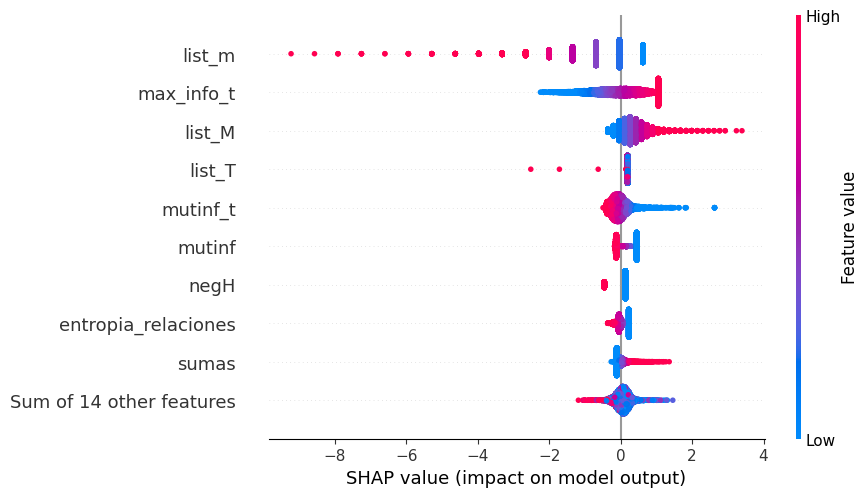

In [82]:
shap.plots.beeswarm(shap_values[:,:,0])

[0.77847474 0.82276753 0.04861899 0.         0.         0.
 0.22222222 0.09090909 0.3047619  0.2        0.08333333 0.66666667] 0 1


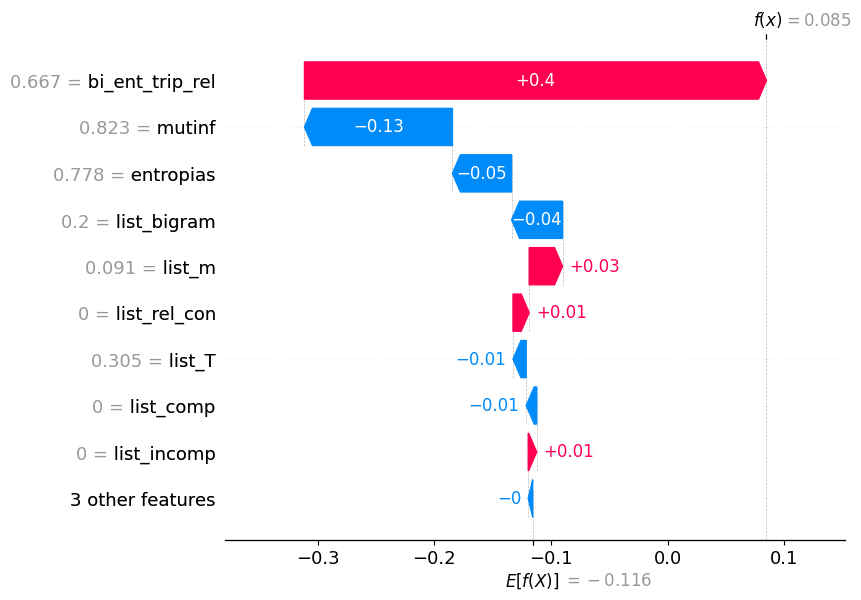

In [121]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

In [122]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

[0.         0.         0.         0.         0.         0.
 0.25925926 0.         0.31428571 0.33333333 0.         0.66666667]


IndexError: index 1 is out of bounds for axis 2 with size 1

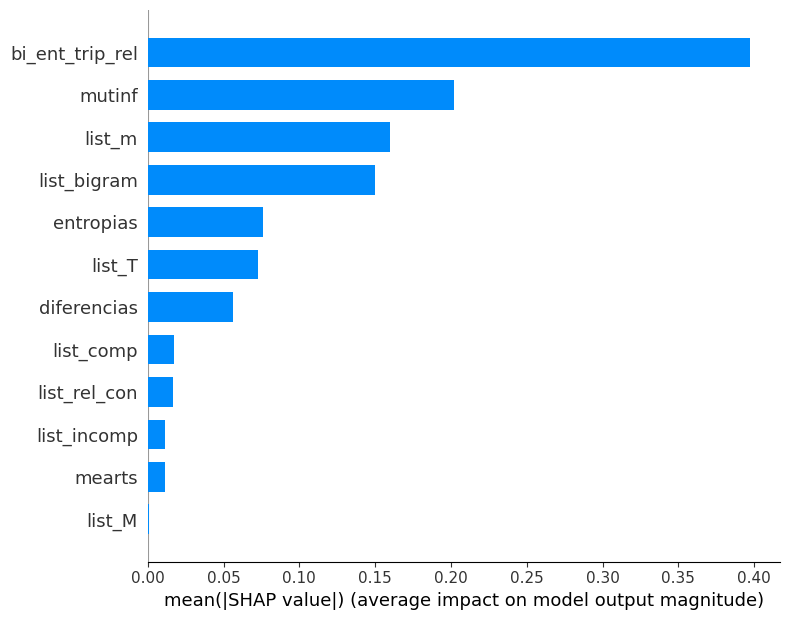

In [123]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

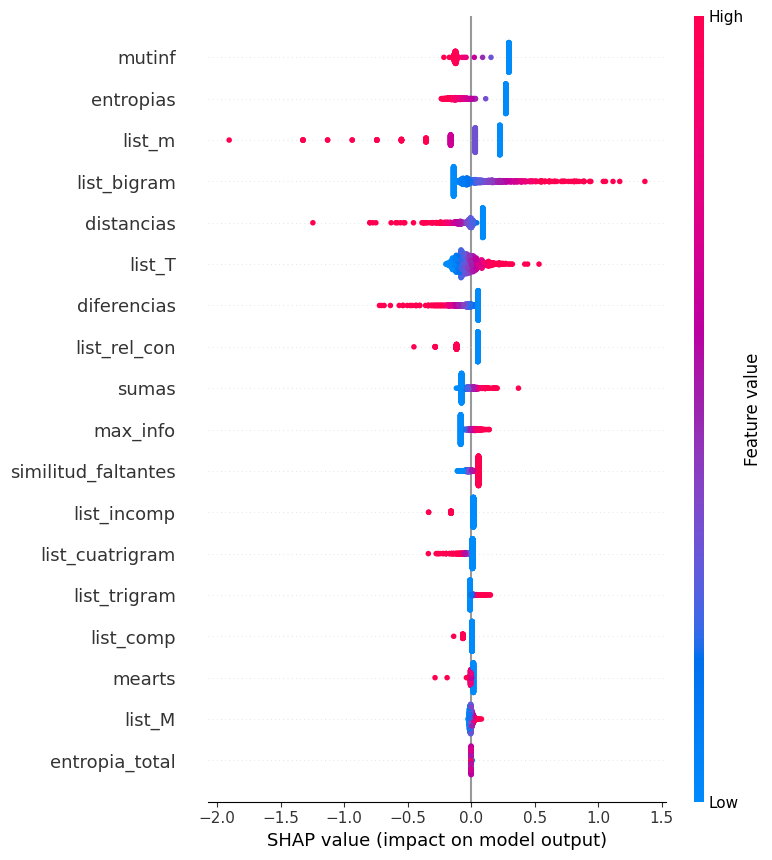

In [81]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

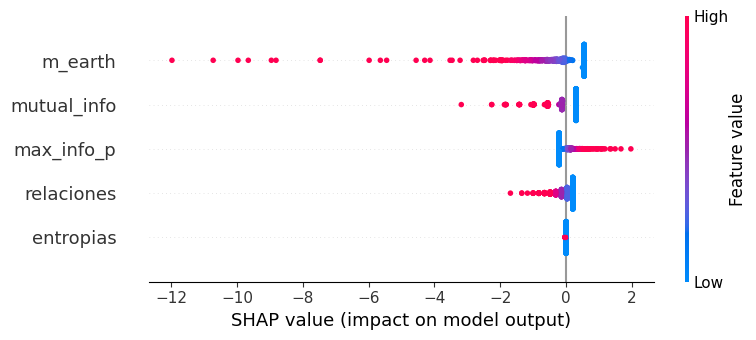

In [ ]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

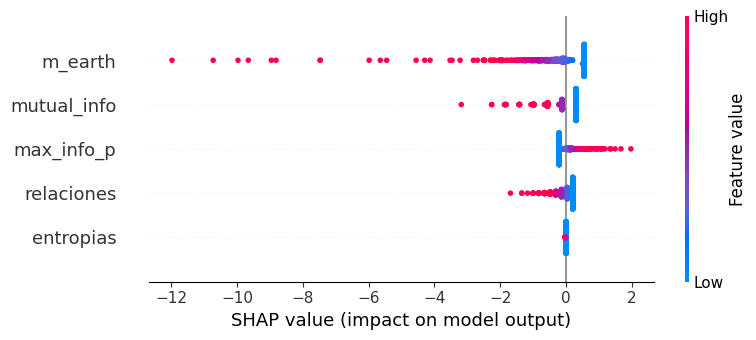

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.58
precision:  0.63
recall 0.42
f1_score:  0.51
matthews_score:  0.17


In [ ]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [ ]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.550000 (0.081558)
DecisionTree: 0.670000 (0.067294)
DecisionTree: 0.580000 (0.060962)


In [ ]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[287, 103],
       [236, 174]])

Profundidad del árbol: 23
Número de nodos terminales: 152


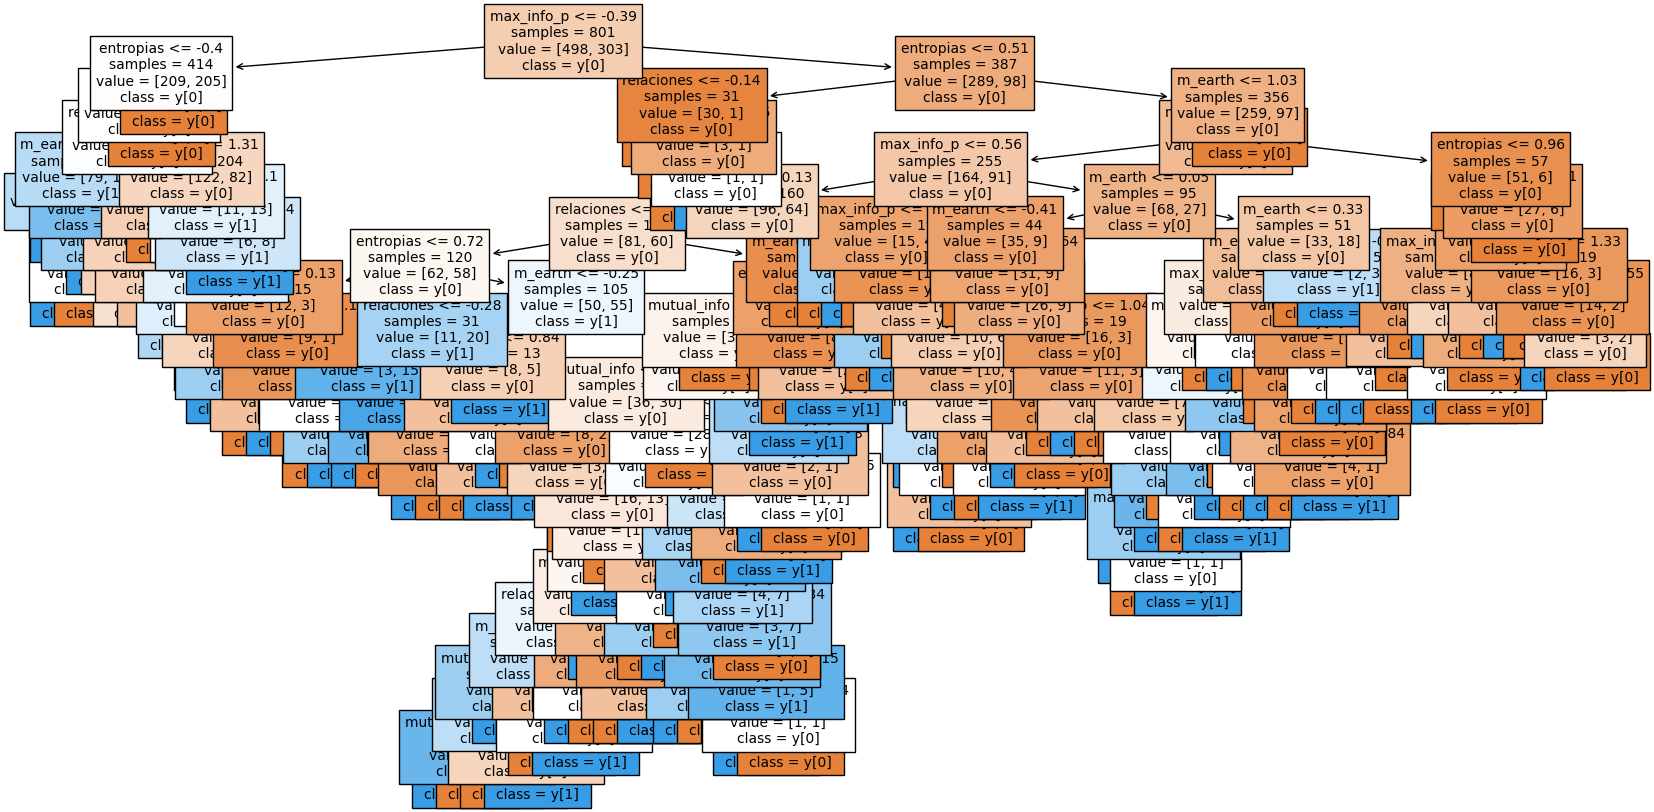

In [ ]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )